<a href="https://colab.research.google.com/github/namgyu71/DAP__/blob/main/LastProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

컴퓨터정보통신공학과 201713408 이남규

데이터분석에 관한 직업들과 그 직업들에 관한 정보들.

kaggle사이트에 업로드되어 있는 정보들을 레퍼런스로 참고.

https://www.kaggle.com/andrewmvd/data-analyst-jobs/tasks?taskId=1356

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter
from wordcloud import WordCloud, STOPWORDS
from google.colab import drive
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots 
from plotly.offline import init_notebook_mode, iplot
drive.mount('/content/drive')
%matplotlib inline


Mounted at /content/drive


In [5]:
filename='/content/drive/MyDrive/codingground/DataAnalyst.csv'
df = pd.read_csv(filename)
df.head()

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),-1,True
1,1,Quality Data Analyst,$37K-$66K (Glassdoor est.),Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,-1
2,2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace\n3.4,"New York, NY","New York, NY",1001 to 5000 employees,2003,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,-1
3,3,Data Analyst,$37K-$66K (Glassdoor est.),Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity\n4.1,"New York, NY","McLean, VA",201 to 500 employees,2002,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),-1,-1
4,4,Reporting Data Analyst,$37K-$66K (Glassdoor est.),ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel\n3.9,"New York, NY","New York, NY",501 to 1000 employees,2009,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),DraftKings,True


In [4]:
#정보
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2253 entries, 0 to 2252
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         2253 non-null   int64  
 1   Job Title          2253 non-null   object 
 2   Salary Estimate    2253 non-null   object 
 3   Job Description    2253 non-null   object 
 4   Rating             2253 non-null   float64
 5   Company Name       2252 non-null   object 
 6   Location           2253 non-null   object 
 7   Headquarters       2253 non-null   object 
 8   Size               2253 non-null   object 
 9   Founded            2253 non-null   int64  
 10  Type of ownership  2253 non-null   object 
 11  Industry           2253 non-null   object 
 12  Sector             2253 non-null   object 
 13  Revenue            2253 non-null   object 
 14  Competitors        2253 non-null   object 
 15  Easy Apply         2253 non-null   object 
dtypes: float64(1), int64(2),

Data Cleaning

In [6]:
#중복되는 것들 하나로 그룹화
df['Job Title'] = df['Job Title'].replace({'Sr. Data Analyst': 'Senior Data Analyst', 
                                               'Sr Data Analyst': 'Senior Data Analyst',
                                               'Sr Analyst, Data': 'Senior Data Analyst',
                                               'Data Analyst Junior': 'Junior Data Analyst'})
df['Job Title'].nunique()

1268

In [7]:
#데이터분석에 관한 직업들
df['Job Title'].value_counts()[:30]

Data Analyst                                                                        405
Senior Data Analyst                                                                 121
Junior Data Analyst                                                                  47
Business Data Analyst                                                                28
Data Quality Analyst                                                                 17
Data Analyst II                                                                      17
Data Governance Analyst                                                              16
Lead Data Analyst                                                                    15
Data Reporting Analyst                                                               13
Financial Data Analyst                                                               12
Data Analyst III                                                                     11
Data Analyst I                  

In [8]:
#범위 정보 또는 다중 정보를 포함하고 있는 컬럼 분산

df.drop(['Unnamed: 0'], axis = 1, inplace = True)

#Job Title가 부서를 포함하고 있기 때문에 Job Title과 Department로 분산
df['Job Title'],df['Department']= df['Job Title'].str.split(',',1).str
df['Company Name'],_ = df['Company Name'].str.split('\n',1).str
df['Salary Estimate'],_= df['Salary Estimate'].str.split('(',1).str

#범위 자료를 다루고 있는 Salary Estimate를 최대와 최소 컬럼으로 분산
df['MinSalary'],df['MaxSalary']= df['Salary Estimate'].str.split('-').str

#Minsalary와 MaxSalary의 가시성을 높이기 위해 다른 문자들 제거
clean_salary = lambda x: x.replace('', np.nan).str.strip().str.lstrip('$').str.rstrip('K').fillna(0).astype(int)
df['MinSalary'] = clean_salary(df['MinSalary'])
df['MaxSalary'] = clean_salary(df['MaxSalary'])

#필요한 자료들을 추출했으니, 필요없어진 Salary Estimate컬럼 삭제
df = df.drop(['Salary Estimate'],axis = 1)

df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning:

Columnar iteration over characters will be deprecated in future releases.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning:

Columnar iteration over characters will be deprecated in future releases.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning:

Columnar iteration over characters will be deprecated in future releases.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning:

Columnar iteration over characters will be deprecated in future releases.



,Job Title,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply,Department,MinSalary,MaxSalary
0,Data Analyst,Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice,"New York, NY","New York, NY",201 to 500 employees,1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),-1,True,Center on Immigration and Justice (CIJ),37,66
1,Quality Data Analyst,Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York,"New York, NY","New York, NY",10000+ employees,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,-1,NaN,37,66
2,Senior Data Analyst,We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace,"New York, NY","New York, NY",1001 to 5000 employees,2003,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,-1,Insights & Analytics Team [Customer Operations],37,66
3,Data Analyst,Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity,"New York, NY","McLean, VA",201 to 500 employees,2002,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),-1,-1,NaN,37,66
4,Reporting Data Analyst,ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel,"New York, NY","New York, NY",501 to 1000 employees,2009,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),DraftKings,True,NaN,37,66


In [9]:
#의미 없는 값들(ex. -1) -> null값 또는 0으로 채우기위한 사전 작업
def recode(column, alter):
    col_cod = pd.Series(column, copy = True)
    for key, values in alter.items():
        col_cod.replace(key, values, inplace = True)
    return col_cod

In [10]:
#-1 -> null값 또는 0으로 채우기
df['Easy Apply'] = recode(df['Easy Apply'],{'-1':0})
df['Competitors'] = recode(df['Competitors'],{'-1':np.nan})

#easy apply로 지원이 간능한 곳만 가시화
df_easy_apply = df[df['Easy Apply'] == 'True']
df_easy_apply.reset_index()
df_easy_apply.head()

,Job Title,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply,Department,MinSalary,MaxSalary
0,Data Analyst,Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice,"New York, NY","New York, NY",201 to 500 employees,1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),NaN,True,Center on Immigration and Justice (CIJ),37,66
4,Reporting Data Analyst,ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel,"New York, NY","New York, NY",501 to 1000 employees,2009,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),DraftKings,True,NaN,37,66
7,Data Science Analyst,Data Science Analyst\n\nJob Details\nLevel\nEx...,3.7,GNY Insurance Companies,"New York, NY","New York, NY",201 to 500 employees,1914,Company - Private,Insurance Carriers,Insurance,$100 to $500 million (USD),"Travelers, Chubb, Crum & Forster",True,NaN,37,66
13,Senior Data Analyst,About Known\n\nKnown is a modern marketing com...,3.0,Known,"New York, NY","New York, NY",201 to 500 employees,2004,Company - Private,Advertising & Marketing,Business Services,$100 to $500 million (USD),NaN,True,NaN,37,66
16,Data Analyst,Undertone stands alone among AdTech and ad net...,3.8,Undertone,"New York, NY","New York, NY",201 to 500 employees,2001,Subsidiary or Business Segment,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"DoubleClick, Specific Media, Collective",True,NaN,37,66


**Data Visualization**

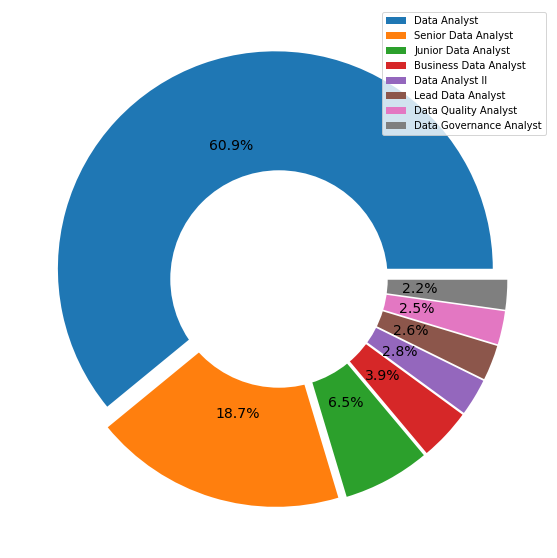

In [11]:
#데이터분석가에 대한 직업의 분포
jobs = Counter(df['Job Title'])

most_common_jobs=jobs.most_common(8)
x,y= zip(*most_common_jobs)
x,y= list(x), list(y)

plt.figure(figsize=(10,10))
plt.pie(y, labels = x, autopct='%1.1f%%', labeldistance = None, pctdistance = 0.6, textprops={'fontsize': 14}, explode=[0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05])
centre_circle = plt.Circle((0,0), 0.50, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.legend( loc='best')


Text(0.5, 1.0, 'Maximum Salary by Job Title')

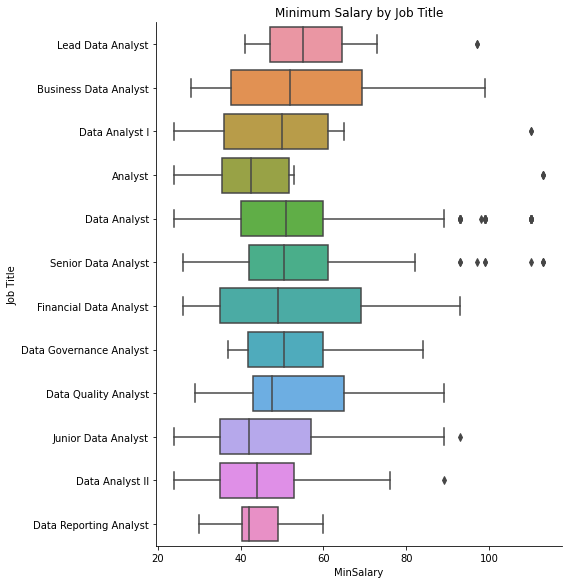

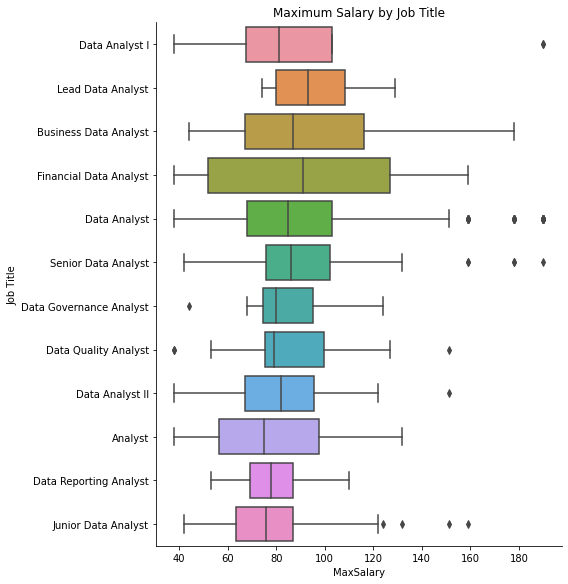

In [12]:
    #각 직업들의 최소급여와 최대급여 분포도
    Job_salary = list(df['Job Title'].value_counts().iloc[:12].index)
    temp = df[df['Job Title'].isin(Job_salary)]
    
    salary_order = temp.groupby('Job Title')['MinSalary'].mean().sort_values(ascending=False).index.values
    
    chart = sns.catplot(data=temp, y='Job Title', x='MinSalary', kind='box', 
                    order=salary_order, 
                    height=8, aspect=1)
    
    plt.title('Minimum Salary by Job Title')
    
    salary_order = temp.groupby('Job Title')['MaxSalary'].mean().sort_values(ascending=False).index.values
    
    chart = sns.catplot(data=temp, y='Job Title', x='MaxSalary', kind='box', 
                    order=salary_order, 
                    height=8, aspect=1)
    
    plt.title('Maximum Salary by Job Title')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



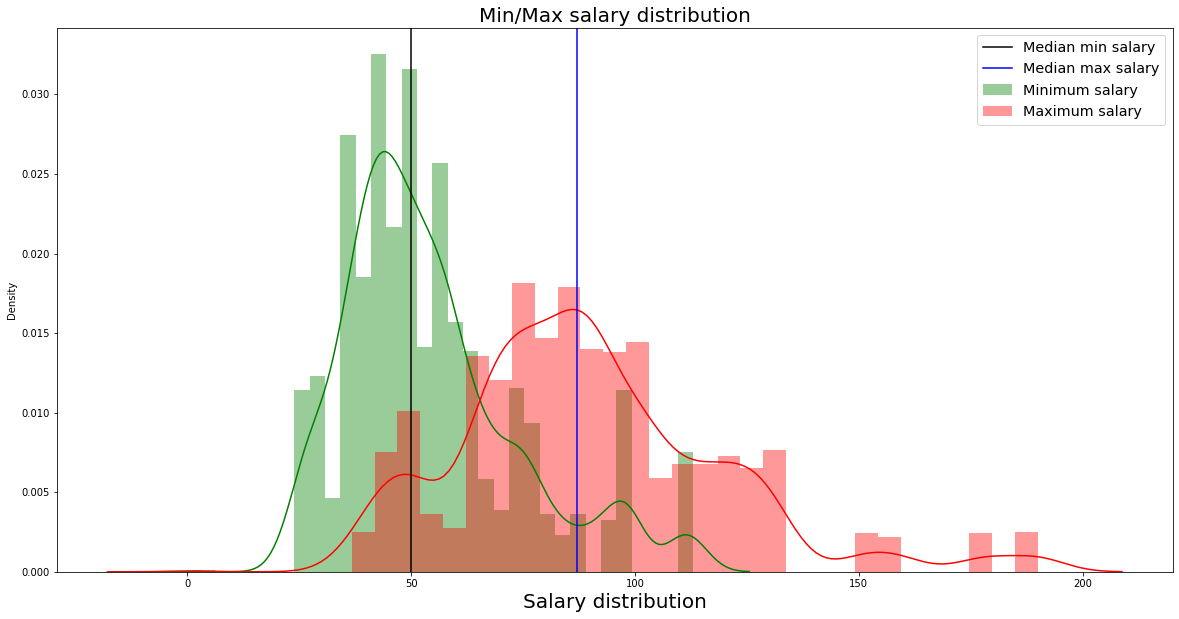

In [29]:
#급여의 전체적인 분포도
fig=plt.figure(figsize=(20,10))
ax1=fig.add_subplot(111)


Min=sns.distplot(df['MinSalary'],ax=ax1,color='green',label='Minimum salary')
Max=sns.distplot(df['MaxSalary'],ax=ax1,color='Red',label='Maximum salary')

Min.axvline(df['MinSalary'].median(),color='black',label='Median min salary')
Max.axvline(df['MaxSalary'].median(),color='Blue',label='Median max salary')

plt.xlabel('Salary distribution',size=20)
plt.title('Min/Max salary distribution',size=20)
plt.legend(fontsize='x-large', title_fontsize='40')

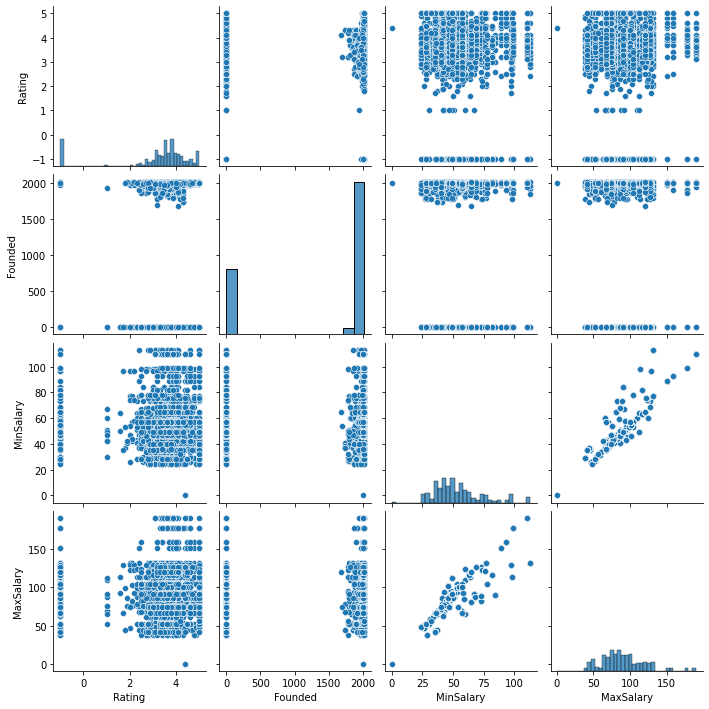

In [15]:
#몇가지 컬럼들의 상관 관계
selectedDataFrame = df[['Rating', 'Founded', 'MinSalary', 'MaxSalary']]
selectedDataFrame.corr(method = 'pearson')
g = sns.pairplot(selectedDataFrame)
plt.show()

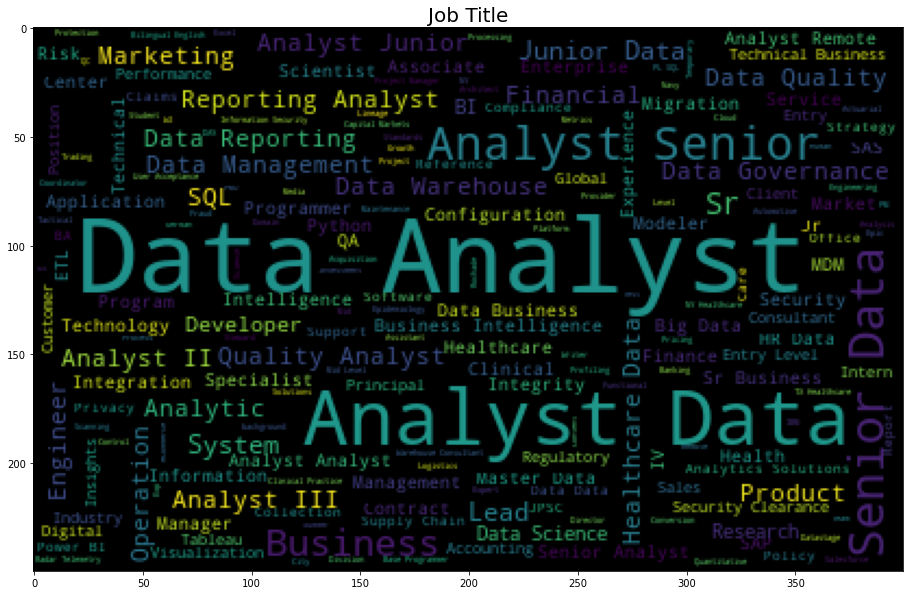

In [16]:
#worldcloud
word = df['Job Title'][~pd.isnull(df['Job Title'])]
wordCloud = WordCloud(width=400,height= 250).generate(' '.join(word))
plt.figure(figsize=(20,10))
plt.axis('on')
plt.title(df['Job Title'].name,fontsize=20)
plt.imshow(wordCloud)
plt.show()


In [33]:
#산업 분야에 따른 easy apply로 지원 가능한 곳만 data mining
df_industry=df[df['Easy Apply']=='True']
df_industry_opening=df_industry.groupby('Industry')['Easy Apply'].count().reset_index()
df_industry_opening.sort_values(by='Easy Apply',ascending=False,inplace=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



([<matplotlib.axis.YTick at 0x7f942f90e850>,
 <a list of 20 Text major ticklabel objects>)

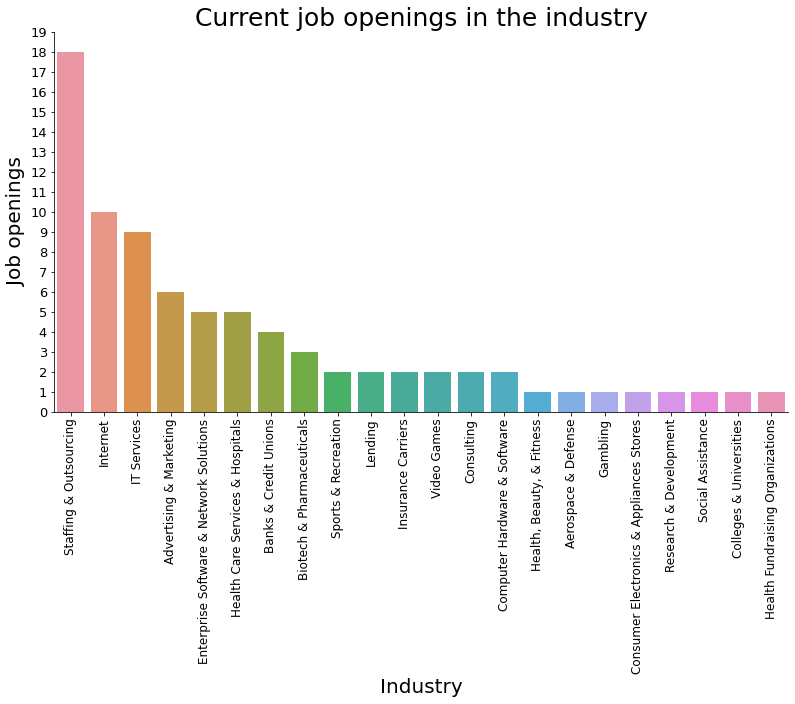

In [21]:
#산업 분야에 따른 easy apply를 이용해 지원 가능한 회사 분포도
sns.catplot('Industry','Easy Apply',data=df_industry_opening,kind='bar',height=6,aspect=2)
plt.xticks(rotation=90,size=12)
plt.ylabel('Job openings',size=20)
plt.xlabel('Industry',size=20)
plt.title('Current job openings in the industry',size=25)
ticks=np.arange(20)
plt.yticks(ticks,fontsize=13)

In [35]:
#지역에 따른 easy apply로 지원 가능한 곳만 data mining
df_location=df_industry.groupby('Location')['Easy Apply'].count().reset_index()
df_location.sort_values('Easy Apply',ascending=False,inplace=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



([<matplotlib.axis.YTick at 0x7f942dc968d0>,
 <a list of 20 Text major ticklabel objects>)

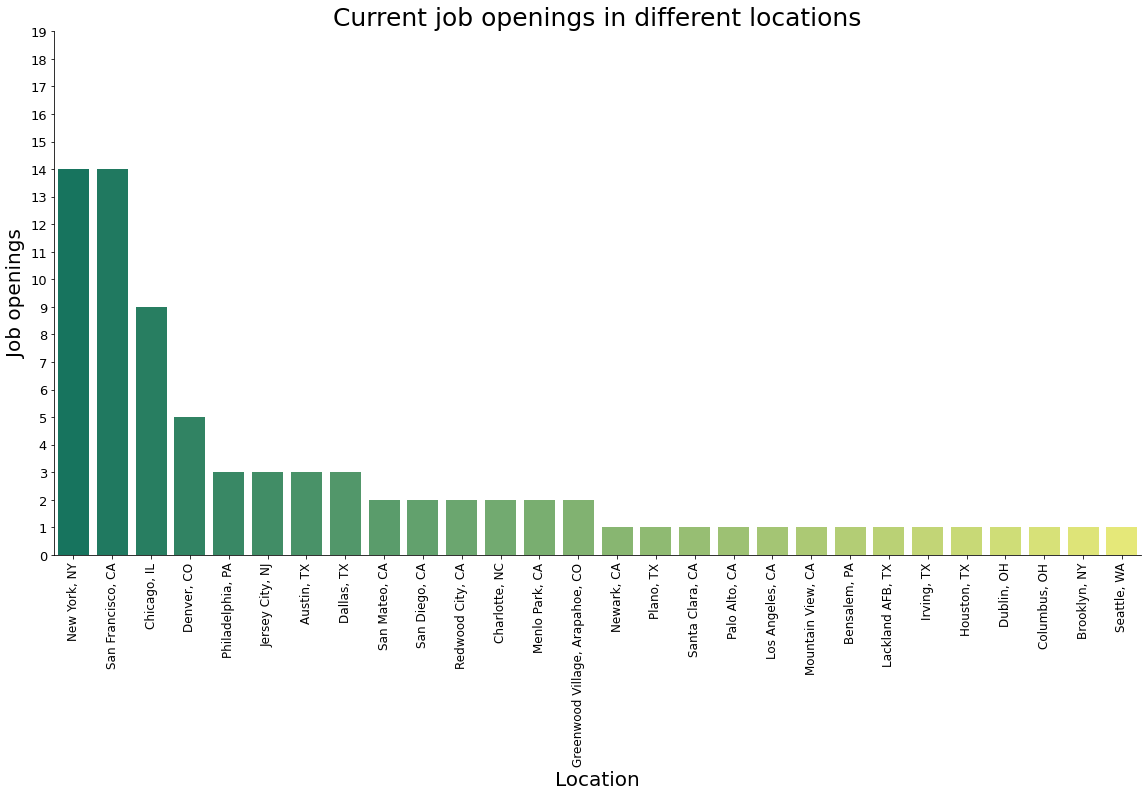

In [36]:
#지역에 따른 easy apply를 이용해 지원 가능한 회사 분포도
sns.catplot('Location','Easy Apply',data=df_location,kind='bar',height=8,aspect=2,palette='summer')
plt.xticks(rotation=90,size=12)
plt.ylabel('Job openings',size=20)
plt.xlabel('Location',size=20)
plt.title('Current job openings in different locations',size=25)
ticks=np.arange(20)
plt.yticks(ticks,fontsize=13)